In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filepath = "../ml/DATA/Advertising.csv"
df = pd.read_csv(filepath)

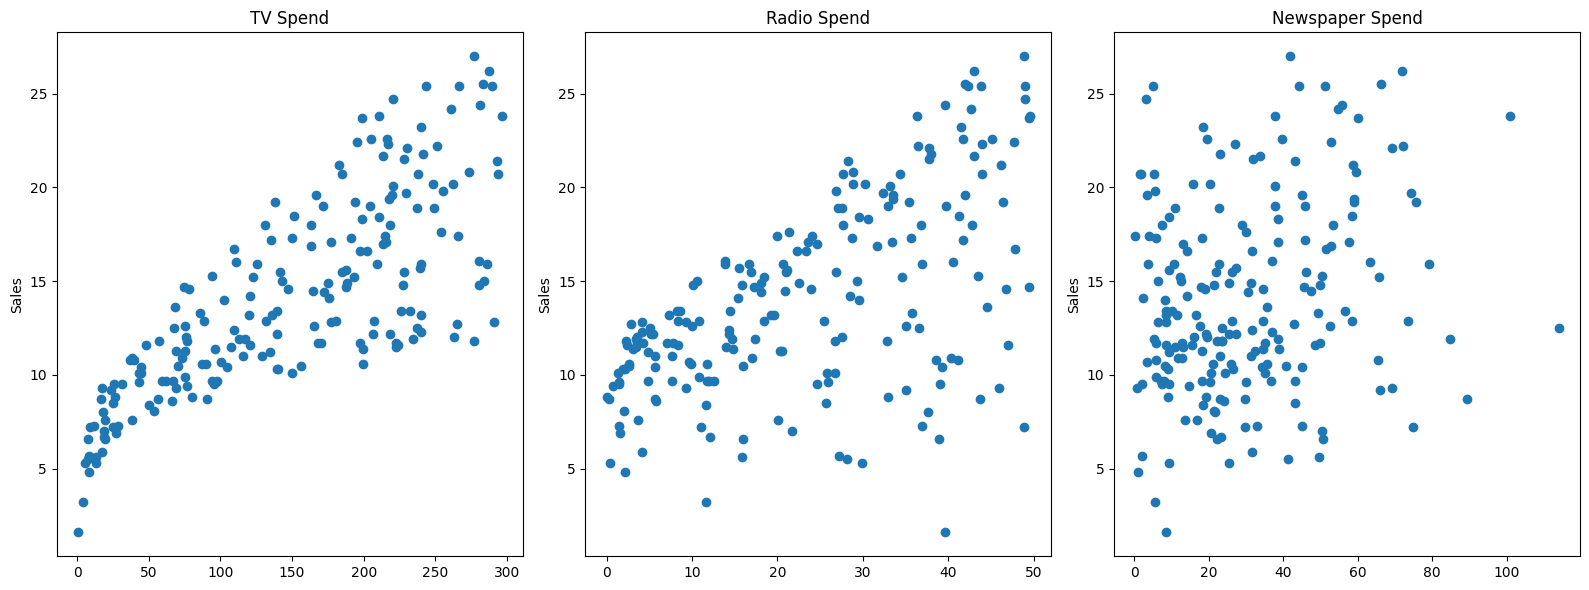

In [9]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df["TV"], df["sales"],"o")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"], df["sales"],"o")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df["newspaper"], df["sales"],"o")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

plt.tight_layout()

### Features

In [10]:
X = df.drop("sales", axis=1)

### Label

In [11]:
y = df["sales"]

## SciKit Learn

### Split Dataset
test_size: percentage of data which goes to the test set  
random_state: arbitrary choice, number must be the same in other model evaluations  
dataset needs to be shuffled randomly before it is split to avoid any type of ordering

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Choose Model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Train Model

In [20]:
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions

In [22]:
test_predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
df["sales"].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

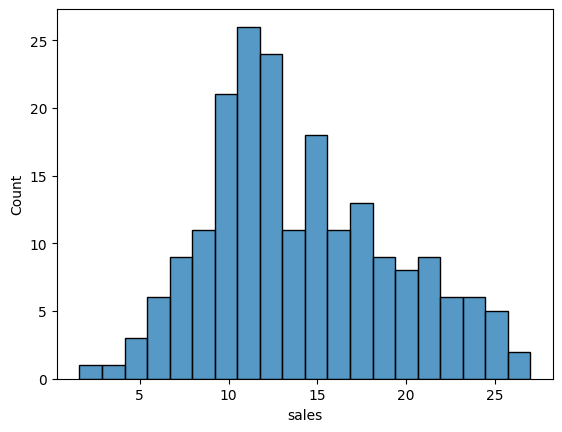

In [28]:
sns.histplot(data=df, x="sales", bins=20)

### Mean Absolute Error

In [30]:
mean_absolute_error(y_test, test_predictions)

1.4937750024728966

### Root Mean Squared Error

In [33]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.9307843822347195

### Residuals Plots
Should look random

In [34]:
test_residuals = y_test - test_predictions

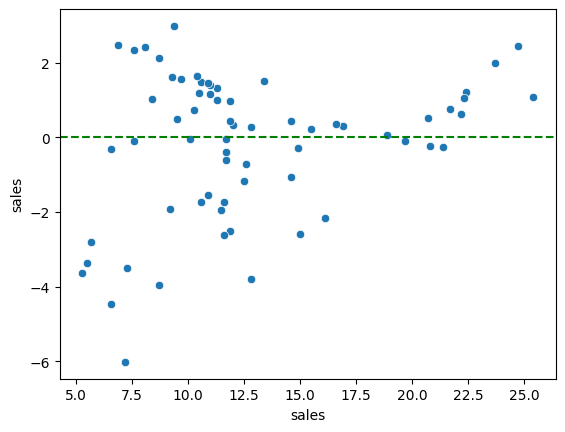

In [38]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color="green", ls="--")

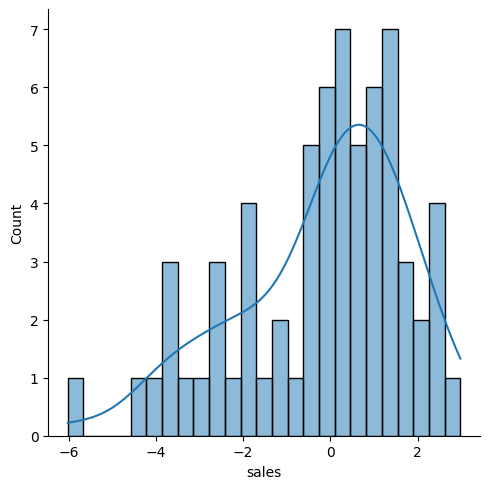

In [39]:
sns.displot(test_residuals, bins=25, kde=True)

### Model Deployment

In [40]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [41]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Model Persistance
### Dumb

In [45]:
from joblib import dump,load

In [46]:
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

### Load

In [47]:
loaded_model = load("final_sales_model.joblib")
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [48]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales ?
campaign = [[149, 22, 12]]
loaded_model.predict(campaign)

/home/xl/projects/py_dev/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])